<a href="https://colab.research.google.com/github/atikahdh/RBDProperty_Kapsel7/blob/main/textprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Melakukan clone repository github ke Google Colab

In [ ]:
!git clone https://github.com/atikahdh/RBDProperty_Kapsel7.git

Cloning into 'RBDProperty_Kapsel7'...
remote: Enumerating objects: 129, done.
remote: Counting objects: 100% (129/129), done.
remote: Compressing objects: 100% (118/118), done.
remote: Total 129 (delta 42), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (129/129), 10.43 MiB | 1.58 MiB/s, done.
Resolving deltas: 100% (42/42), done.


In [ ]:
!ls

NLP_Models  RBDProperty_Kapsel7  sample_data


Import Modul

In [ ]:
pip install docx2txt

In [ ]:
pip install Unidecode

In [ ]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

Membuat directory untuk text processing

In [ ]:
!mkdir NLP_Models
!wget -P NLP_Models/ https://raw.githubusercontent.com/atikahdh/RBDProperty_Kapsel7/main/NLP_Models/TextMining.py
!wget -P NLP_Models/ https://raw.githubusercontent.com/atikahdh/RBDProperty_Kapsel7/main/NLP_Models/openewfile.py
!wget -P NLP_Models/ https://raw.githubusercontent.com/atikahdh/RBDProperty_Kapsel7/main/NLP_Models/CleanText.py
!wget -P NLP_Models/ https://raw.githubusercontent.com/atikahdh/RBDProperty_Kapsel7/main/NLP_Models/modelling.py
!mkdir NLP_Models/slangword
!wget -P NLP_Models/slangword/ https://raw.githubusercontent.com/atikahdh/RBDProperty_Kapsel7/main/text%20processing/slangword/20210315_slangword.txt
!mkdir NLP_Models/stopword
!wget -P NLP_Models/stopword/ https://raw.githubusercontent.com/atikahdh/RBDProperty_Kapsel7/main/text%20processing/stopword/20190327_stopword_id.txt
!mkdir NLP_Models/stopword_en
!wget -P NLP_Models/stopword/ https://raw.githubusercontent.com/atikahdh/RBDProperty_Kapsel7/main/text%20processing/stopword_en/20190327_stopwords_en.txt
!mkdir NLP_Models/stopword_noise
!wget -P NLP_Models/stopword_noise/ https://raw.githubusercontent.com/atikahdh/RBDProperty_Kapsel7/main/text%20processing/stopword_noise/20190327_stopword_noise.txt

mkdir: cannot create directory ‘NLP_Models’: File exists
--2021-10-29 10:07:47--  https://raw.githubusercontent.com/atikahdh/RBDProperty_Kapsel7/main/NLP_Models/TextMining.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10088 (9.9K) [text/plain]
Saving to: ‘NLP_Models/TextMining.py’

TextMining.py       100%[===================>]   9.85K  --.-KB/s    in 0s      

2021-10-29 10:07:48 (80.3 MB/s) - ‘NLP_Models/TextMining.py’ saved [10088/10088]

--2021-10-29 10:07:48--  https://raw.githubusercontent.com/atikahdh/RBDProperty_Kapsel7/main/NLP_Models/openewfile.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.110.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.1

Import Modul

In [ ]:
import pandas as pd
from NLP_Models import TextMining as tm
from NLP_Models import CleanText as ct
from NLP_Models import modelling as mdg
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

Text Processing

In [ ]:
dataPath = tm.crawlFiles('/content/RBDProperty_Kapsel7/DATA/', types = 'json')

In [ ]:
data = pd.concat([pd.read_json(f, lines = True) for f in dataPath])

In [ ]:
data.to_json('/content/RBDProperty_Kapsel7/DATA/dataready.json', orient='records')

In [ ]:
dataready = pd.read_json('/content/RBDProperty_Kapsel7/DATA/dataready.json')

In [ ]:
dataready.head()

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,metadata,source,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,in_reply_to_user_id_str,in_reply_to_screen_name,user,geo,coordinates,place,contributors,is_quote_status,retweet_count,favorite_count,favorited,retweeted,possibly_sensitive,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status
0,2021-10-28 06:48:19,1453614589636071431,1453614589636071424,@korantempo Apakah ini tidak cukup dan kurang ...,False,"[12, 188]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 1453614555121078280, 'id_str...","{'iso_language_code': 'in', 'result_type': 're...","<a href=""http://twitter.com/download/android"" ...",1.453459e+18,1.453459e+18,2.096343e+07,2.096343e+07,korantempo,"{'id': 1380466490923712514, 'id_str': '1380466...",None,None,None,NaN,False,0,0,False,False,0.0,in,None,NaN,NaN,None
1,2021-10-28 06:47:54,1453614484497453062,1453614484497453056,RT @DemokratIsMe14: Profesor Singapura: SBY Pi...,False,"[0, 114]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 1453557478658953217, 'id_str...","{'iso_language_code': 'in', 'result_type': 're...","<a href=""http://twitter.com/download/android"" ...",NaN,NaN,NaN,NaN,None,"{'id': 1363655808827813890, 'id_str': '1363655...",None,None,None,NaN,False,27,0,False,False,0.0,in,{'created_at': 'Thu Oct 28 03:01:25 +0000 2021...,NaN,NaN,None
2,2021-10-28 06:47:25,1453614362711580674,1453614362711580672,RT @RamliRizal: Salut untuk Mahkamah Konstitus...,False,"[0, 140]","{'hashtags': [], 'symbols': [], 'user_mentions...",None,"{'iso_language_code': 'in', 'result_type': 're...","<a href=""http://twitter.com/download/iphone"" r...",NaN,NaN,NaN,NaN,None,"{'id': 986159088, 'id_str': '986159088', 'name...",None,None,None,NaN,False,15,0,False,False,NaN,in,{'created_at': 'Thu Oct 28 05:48:45 +0000 2021...,NaN,NaN,None
3,2021-10-28 06:46:31,1453614134772191234,1453614134772191232,RT @Mah5Utari: Mencoba melihat dr 2 sisi..\nWA...,False,"[0, 139]","{'hashtags': [], 'symbols': [], 'user_mentions...",None,"{'iso_language_code': 'in', 'result_type': 're...","<a href=""http://twitter.com/download/android"" ...",NaN,NaN,NaN,NaN,None,"{'id': 853560510238806016, 'id_str': '85356051...",None,None,None,NaN,False,35,0,False,False,NaN,in,{'created_at': 'Thu Oct 28 02:42:03 +0000 2021...,NaN,NaN,None
4,2021-10-28 06:46:19,1453614086206283778,1453614086206283776,@BoyPapua61 Katanya ini negara demokrasi. Kata...,False,"[12, 105]","{'hashtags': [], 'symbols': [], 'user_mentions...",None,"{'iso_language_code': 'in', 'result_type': 're...","<a href=""http://twitter.com/download/android"" ...",1.453037e+18,1.453037e+18,1.334107e+18,1.334107e+18,BoyPapua61,"{'id': 1169805912543916032, 'id_str': '1169805...",None,None,None,NaN,False,0,0,False,False,NaN,in,None,NaN,NaN,None


In [ ]:
dataready.rename(columns={'full_text':'text'}, inplace=True)

In [ ]:
dataready = ct.cleanningtext(data = dataready, both = True, onlyclean = False, sentiment = False)

Cleaning Text


100%|██████████| 32355/32355 [00:00<00:00, 165279.71it/s]


89.27791595458984 seconds


In [ ]:
ready = dataready[['text', 'cleaned_text']]

In [ ]:
ready.head()

,text,cleaned_text
0,@korantempo apakah ini tidak cukup dan kurang ...,apakah ini tidak negxcukup kurang negxjelas un...
1,rt @demokratisme14: profesor singapura: sby pi...,retweet profesor singapura sby pimpin pembangu...
2,rt @ramlirizal: salut untuk mahkamah konstitus...,retweet salut untuk mahkamah konstitusi tumben...
3,rt @mah5utari: mencoba melihat dr 2 sisi..\nwa...,retweet mencoba melihat dari sisi wadah terseb...
4,@boypapua61 katanya ini negara demokrasi. kata...,katanya ini negara demokrasi katanyaa sungguh ...


In [ ]:
dataready.keys()

Index(['created_at', 'id', 'id_str', 'text', 'truncated', 'display_text_range',
       'entities', 'extended_entities', 'metadata', 'source',
       'in_reply_to_status_id', 'in_reply_to_status_id_str',
       'in_reply_to_user_id', 'in_reply_to_user_id_str',
       'in_reply_to_screen_name', 'user', 'geo', 'coordinates', 'place',
       'contributors', 'is_quote_status', 'retweet_count', 'favorite_count',
       'favorited', 'retweeted', 'possibly_sensitive', 'lang',
       'retweeted_status', 'quoted_status_id', 'quoted_status_id_str',
       'quoted_status', 'cleaned_text'],
      dtype='object')

Melihat tweet dengan retweet dan like terbanyak

In [ ]:
retweet = dataready[['text', 'retweet_count']]
retweet.sort_values(by=['retweet_count'], ascending=False).head()
#retweet.loc[28727, 'text']

,text,retweet_count
4228,rt @reflyhz: meminta presiden mundur itu nggk ...,3774
7219,"rt @sbyudhoyono: tuhan, seraya gigih berikhtia...",3190
12100,rt @nahdlatululama: pbnu: uu cipta kerja menin...,3097
4882,"rt @nazaqistsha: prihatin, dan sedih adanya or...",3045
5213,rt @temponewsroom: ketua kpk firli bahuri didu...,2838


In [ ]:
like = dataready[['text', 'favorite_count']]
like.sort_values(by=['favorite_count'], ascending=False).head()
#like.loc[17052, 'text']

,text,favorite_count
13936,@poljokesid buat yang belum tahu siapa yang du...,2111
17529,"menurut pembaca, berapa nilai rapor dari 2 tah...",1882
30451,tragis: pemerintah lbh pentingkan kereta cepat...,1807
27387,tragis: pemerintah lbh pentingkan kereta cepat...,1806
31914,terimakasih presiden @jokowi atas segala kehor...,1452


Save data yang sudah di cleaning

In [ ]:
textclean = dataready[['cleaned_text']]

In [ ]:
textclean

,cleaned_text
0,apakah ini tidak negxcukup kurang negxjelas un...
1,retweet profesor singapura sby pimpin pembangu...
2,retweet salut untuk mahkamah konstitusi tumben...
3,retweet mencoba melihat dari sisi wadah terseb...
4,katanya ini negara demokrasi katanyaa sungguh ...
...,...
32350,retweet kemendikbudristek mengalokasikan angga...
32351,retweet kemendikbudristek mengalokasikan angga...
32352,retweet indonesia bersyukur memiliki presiden ...
32353,kenapa harus membedakan yang ini boleh ditiru ...


In [ ]:
textclean.to_csv('textclean.txt', index=False)

Spatial analysis

In [ ]:
!pip install unidecode twython tweepy beautifulsoup4 tika

  Created wheel for tika: filename=tika-1.24-py3-none-any.whl size=32891 sha256=ebd3df86ddaea01b0d58d4a912162942ca652981a58916cca3922a941e86f964
  Stored in directory: /root/.cache/pip/wheels/ec/2b/38/58ff05467a742e32f67f5d0de048fa046e764e2fbb25ac93f3
Successfully built tika


In [ ]:
import warnings; warnings.simplefilter('ignore')
import tweepy, json, nltk, urllib.request, requests
from urllib.request import Request, urlopen
from twython import TwythonStreamer
from bs4 import BeautifulSoup as bs

In [ ]:
Ck = 'tXIjpNtsebTPQXPeI0srjbmtJ' # consumer_key
Cs = 'WEJtNxUHC4nvOG9Je3iZs3PRBqMAqGHfsGYrkyQngCC2w0VvU5' # consumer_secret
At = '1346046289922805760-1LRd2BXqBQ8ncIQB4991tyiQUpioMU' # access_token
As = 'nCF5jP6cxF4WAgvC2cgOKsruXBUVd7hFZY5WA2gsCSJyO' # access_secret

In [ ]:
def connect(Ck, Cs, At, As):
    auth = tweepy.auth.OAuthHandler(Ck, Cs)
    auth.set_access_token(At, As)
    api = tweepy.API(auth)
    usr_ = api.verify_credentials()
    print('Welcome "{}" you are now connected to twitter server'.format(usr_.name))
    return api

In [ ]:
api = connect(Ck, Cs, At, As)

Welcome "Tikaa" you are now connected to twitter server


In [ ]:
auth = tweepy.auth.OAuthHandler(Ck, Cs)
auth.set_access_token(At, As)
api = tweepy.API(auth)

Geo, N = "-6.225014,106.900444,25km", 30  # HAti-hati jangan ada spasi di Lat-Lon-Radius
qry = 'pemerintah indonesia'
for tweet in tweepy.Cursor(api.search, q=qry, count=100, geocode=Geo).items(N):
    print([tweet.created_at, tweet.text.encode('utf-8'), tweet.user.id, tweet.geo])

[datetime.datetime(2021, 10, 29, 9, 51, 33), b'Presiden Jokowi berterima kasih pada jurnalis TV yang telah membantu pemerintah menanganai pandami Covid-19 di Indo\xe2\x80\xa6 https://t.co/zXxCaDVAqc', 154102750, None]
[datetime.datetime(2021, 10, 29, 9, 20, 11), b'@alhasbiii @p_winza @PSI_Jakarta Dengan berita ini berarti pemerintah JOKOWI TIDAK BECUS BEKERJA. begitu maksud and\xe2\x80\xa6 https://t.co/C0FjC4uwxE', 1052408643285647360, None]
[datetime.datetime(2021, 10, 29, 9, 8, 21), b'Pemerintah Indonesia melalui Kementerian Pariwisata dan Ekonomi Kreatif tengah menggaungkan potensi pariwisata Tana\xe2\x80\xa6 https://t.co/qK3ATTLABD', 30617522, None]
[datetime.datetime(2021, 10, 29, 9, 3, 33), b'Intip Strategi Pemerintah Terapkan Ekonomi Hijau di Indonesia https://t.co/Dk1fhLJMiK', 41730943, None]
[datetime.datetime(2021, 10, 29, 8, 34, 7), b'14. Pemerintah juga membuat aturan khusus bagi wisatawan yang hendak berlibur. Mereka hanya boleh melewati bandara\xe2\x80\xa6 https://t.co/Z3

Interpretasi Spatial Analysis : pada analisis ini kami mengambil latitude dan longitude dari daerah Jakarta Timur, dari hasil diatas ada sekitar 29 output dengan tweets yang cukup beragam topik seperti pariwisata, pandemi covid dan UMKM. dari hasil diatas dapat diperlihatkan bahwa pembicaraan terkait pemerintahan dan pariwisata adalah yang paling banyak pada data diatas.

Wordcloud

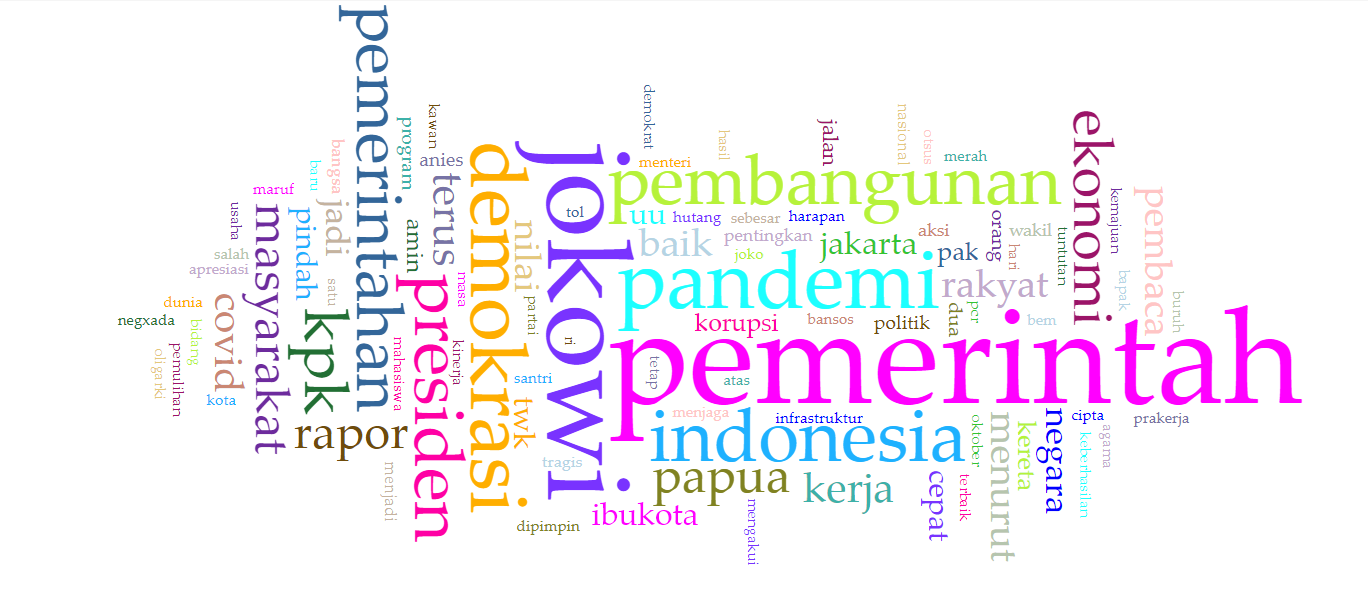

Interpretasi wordcloud : berdasarkan wordcloud diatas dapat dilihat bahwa 6 kata kata yang paling sering keluar pada data yang kami gunakan adalah Pemerintah(10930), jokowi(8540), pandemi(4471), demokrasi(4438), indonesia(4120) dan pembangunan(3562). 

Links

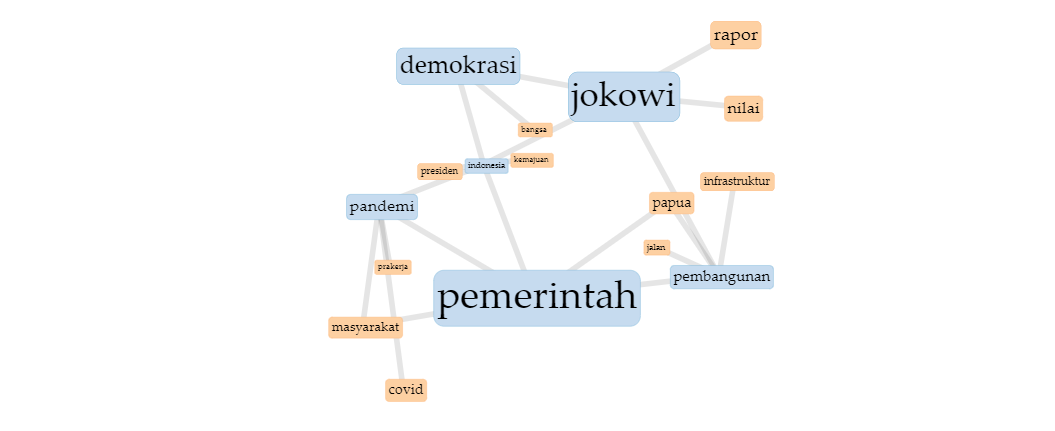

Interpretasi Links : berdasarkan wordlink jika isu pembangunan yang dibicarakan maka isu seperti jalan, papua, infrasruktur dan pemerintah juga dibicarakan. jika sedang membicarakan terkait pemerintah maka isu isu yang ikut dibicarakan adalah masyarakat, papua, demokrasi dan pandemi. jika pandemi menjadi topik pembicaraan maka isu terkaitnya adalah masyarakat, covid, prakerja. isu isu seperti presiden dan kemajuan dibicarakan ketika topik indonesia sedang diangkat. topik demokrasi terkait dengan isu pemerintah, jokowi dan bangsa. topik jokowi akan mengangkat isu pandemi, demokrasi, nilai, rapor dan pembangunan.



Trends

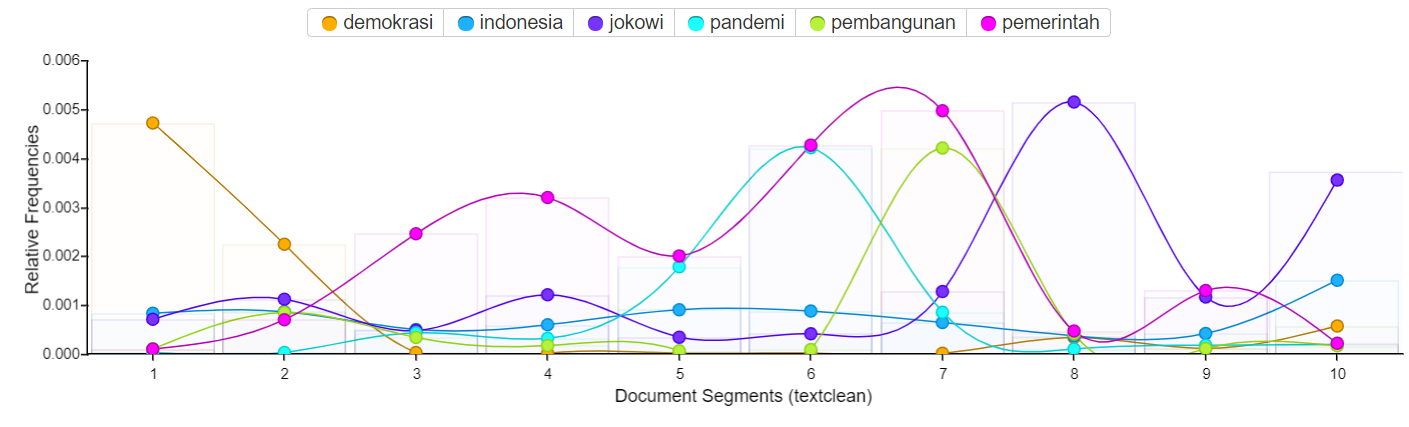

Interpretasi Trends : dari grafik diatas dapat kita ambil kesimpulan bahwa topik indonesia, jokowi, pandemi, pembangunan dan pemerintahan dibicarakan pada saat yang sama pada data, jadi ketika kita membicarakan topik jokowi kemungkinan besar isu indonesia, pandemi, pembangunan dan pemerintahan ikut dibicarakan juga. dari grafik juga dapat dilihat bahwa terdapat penurunan yang signifikan terhadap topik demokrasi di segmen pertama sampai ketiga. topik pemerintahan paling tinggi dibicarakan pada segmen ke 7 dan pada topik jokowi pada segmen ke 8 serta topik pandemi pada segmen ke 6. 